### European Soccer Data Analysis

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import sqlite3

In [67]:
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates

In [4]:
database = 'database.sqlite'
conn = sqlite3.connect(database)

In [5]:
tables = pd.read_sql("""SELECT * FROM sqlite_master WHERE type='table';""", conn)

In [8]:
raw = pd.read_sql_query("SELECT * FROM Player_Attributes", conn)

In [9]:
train = raw.copy()
train.shape

(183978, 42)

In [11]:
train.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


#### Data Cleaning

In [13]:
train.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [14]:
# an easy way to drop all null values row-wise
# or we drop by each row using loc function but too many lines
''' train = train.drop(train.loc[train['row_name'].isnull()].index)
'''
train = train.dropna()

In [15]:
train.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [16]:
train.shape

(180354, 42)

In [20]:
# this function helps focus on specific columns we are going to zoom in
train[:20][['penalties', 'overall_rating']]

,penalties,overall_rating
0,48.0,67.0
1,48.0,67.0
2,48.0,62.0
3,47.0,61.0
4,47.0,61.0
5,59.0,74.0
6,59.0,74.0
7,59.0,73.0
8,59.0,73.0
9,59.0,73.0


In [21]:
# check their correlation
train.overall_rating.corr(train.penalties)
# or 
'''train['overall_rating'].corr(train['penalties'])
'''

0.39271510791118897

In [24]:
# now we may check several features to verify our assumption
fc = ['potential', 'penalties', 'crossing', 'finishing', 'heading_accuracy', 'dribbling', 'ball_control', 'acceleration', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'interceptions', 'vision']
print('correlations are as follows')
for i in fc:
    sc = train.overall_rating.corr(train[i])
    print('{0} : {1}'.format(i, sc))


correlations are as follows
potential : 0.7654346716757741
penalties : 0.39271510791118897
crossing : 0.3573201803543208
finishing : 0.33007854277118553
heading_accuracy : 0.31332410055165116
dribbling : 0.35419060093846744
ball_control : 0.443990762826299
acceleration : 0.2439984883712968
agility : 0.2399628207884931
reactions : 0.7718560966627348
balance : 0.1602107785208074
shot_power : 0.4280531322219387
jumping : 0.2589783181304958
stamina : 0.3256056577869246
strength : 0.31568376240757984
interceptions : 0.24909402566182123
vision : 0.43149329504794093


In [44]:
# now we check all columns
crr = train.corr()
#sorted(crr.overall_rating, reverse = True)
comb = crr.overall_rating.sort_values(ascending = False)
comb

overall_rating        1.000000
reactions             0.771856
potential             0.765435
short_passing         0.458243
ball_control          0.443991
long_passing          0.434525
vision                0.431493
shot_power            0.428053
penalties             0.392715
long_shots            0.392668
positioning           0.368978
volleys               0.361739
curve                 0.357566
crossing              0.357320
dribbling             0.354191
free_kick_accuracy    0.349800
finishing             0.330079
stamina               0.325606
aggression            0.322782
strength              0.315684
heading_accuracy      0.313324
jumping               0.258978
sprint_speed          0.253048
interceptions         0.249094
acceleration          0.243998
agility               0.239963
standing_tackle       0.163986
balance               0.160211
marking               0.132185
sliding_tackle        0.128054
gk_kicking            0.028799
gk_diving             0.027675
gk_posit

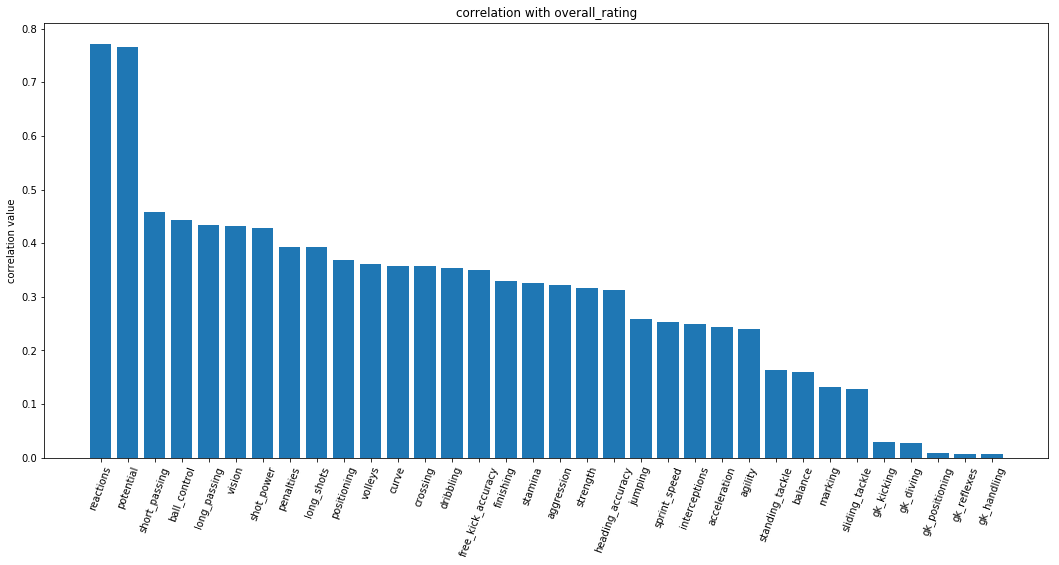

In [52]:
# plot all values with overall_rating
x = np.arange(34)
plt.figure(figsize = (18, 8))
plt.bar(x, comb[1:35])
plt.xticks(x, comb[1:35].index, rotation = 70)
plt.title('correlation with overall_rating')
plt.ylabel('correlation value')
plt.show()

In [54]:
s6 = ['reactions', 'potential', 'ball_control', 'vision', 'strength', 'sprint_speed']

In [62]:
ntrain = train[s6].copy()
ntrain.head()

,reactions,potential,ball_control,vision,strength,sprint_speed
0,47.0,71.0,49.0,54.0,76.0,64.0
1,47.0,71.0,49.0,54.0,76.0,64.0
2,47.0,66.0,49.0,54.0,76.0,64.0
3,46.0,65.0,48.0,53.0,76.0,64.0
4,46.0,65.0,48.0,53.0,76.0,64.0


#### KMeans

In [60]:
### kmeans clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [63]:
dt = scale(ntrain)

In [64]:
noOfClusters = 4
md = KMeans(init = 'k-means++', n_clusters = noOfClusters, n_init = 20).fit(dt)

In [65]:
print('# of players in each clusters')
pd.value_counts(md.labels_, sort=False)

# of players in each clusters


0    41268
1    19280
2    55683
3    64123
dtype: int64

In [68]:
def pd_centers(featuresUsed, centers):
    
    colNames = list(featuresUsed)
    colNames.append('prediction')
    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]
    
    # Convert to pandas for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

def parallel_plot(data):
    
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-2.5,+2.5])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [69]:
Pan = pd_centers(featuresUsed=s6, centers=md.cluster_centers_)
Pan

,reactions,potential,ball_control,vision,strength,sprint_speed,prediction
0,-0.673483,-0.514457,0.061942,0.045041,-1.073390,0.312112,0
1,-0.614097,-0.393124,-2.269962,-1.729146,-0.164308,-1.646883,1
2,-0.240690,-0.452640,-0.123739,-0.308321,0.655799,-0.305648,2
3,0.828032,0.843503,0.752133,0.760593,0.169699,0.561580,3


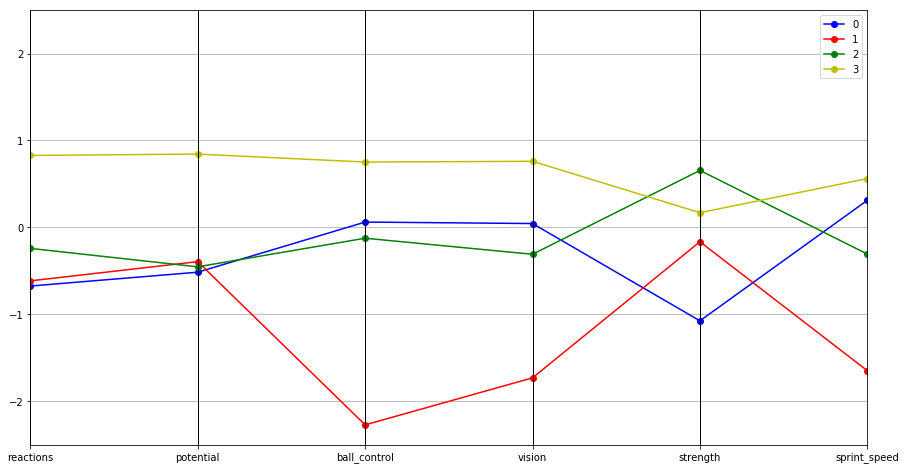

In [70]:
parallel_plot(Pan)